In [1]:
import torch
import torch.nn as nn 
import pandas as pd
import numpy as np
import time
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import datetime
import os

In [3]:
from src.model.modelImprovisedGan import Encoder,Decoder,Critic
from src.utils.losses import Wasserstein
from src.utils.util import *
from src.dataset.Nabdataset import NabDataset
from src.algorithms.ImprovisedGAN import ImprovisedGAN

ModuleNotFoundError: No module named 'model'

In [439]:
#This is the beginning of programm
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
    


09:45:26


<h4>Initializing Dataset</h4>

In [22]:
class ArgsTrn:
    workers=4
    batch_size=32
    epochs=5
    lr=0.0002
    cuda = True
    manualSeed=2
    mean=0
    std=0.1
    
opt_trn=ArgsTrn()
    
opt_trn=ArgsTrn()
torch.manual_seed(opt_trn.manualSeed)



class Datasettings:
    
    def __init__(self):
        end_name='exchange-2_cpc_results.csv'
        self.data_folder_path=os.path.join("/data/nab/")
        key='realAdExchange/'+end_name 
        self.label_file = './lables/combined_windows.json'
        self.key=key
        self.train=True
        self.window_length=60

In [20]:
data_settings = Datasettings()
dataset = NabDataset(data_settings=data_settings)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=opt_trn.batch_size,
                                         shuffle=True, num_workers=int(opt_trn.workers))
seq_len = dataset.window_length # sequence length is equal to the window length
in_dim = dataset.n_feature # input dimension is same as number of feature
n_features=dataset.x.shape[2]
sequences=[x for i, (x,y) in enumerate(dataloader, 0)]

ValueError: No objects to concatenate

In [442]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [443]:
dataset.x.shape

torch.Size([1401, 60, 1])

In [444]:
'''
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())
'''

'\nimport torch\nimport sys\nprint(\'__Python VERSION:\', sys.version)\nprint(\'__pyTorch VERSION:\', torch.__version__)\nprint(\'__CUDA VERSION\')\nfrom subprocess import call\n# call(["nvcc", "--version"]) does not work\n! nvcc --version\nprint(\'__CUDNN VERSION:\', torch.backends.cudnn.version())\nprint(\'__Number CUDA Devices:\', torch.cuda.device_count())\nprint(\'__Devices\')\ncall(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])\nprint(\'Active CUDA Device: GPU\', torch.cuda.current_device())\nprint (\'Available devices \', torch.cuda.device_count())\nprint (\'Current cuda device \', torch.cuda.current_device())\n'

In [445]:
improvisedGAN=ImprovisedGAN(device=device,opt_trn=opt_trn,windows_length=seq_len,n_features=n_features,in_dim=in_dim)

<h4>CriticX training</h4>

In [446]:
criticX=improvisedGAN.train_criticX(sequences)

/home/jupyter/src/algorithms/GranoGAN.py:110: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = Variable(init.normal(torch.Tensor(batch_size,seq_len,self.in_dim),mean=self.mean,std=self.std))


Epoch 0: train loss -0.21731734763492236
Epoch 1: train loss -0.8233082436702468
Epoch 2: train loss -1.517297685688192
Epoch 3: train loss -1.7524508725513108
Epoch 4: train loss -1.8110049865462563
Epoch 5: train loss -1.8412345111370092
Epoch 6: train loss -1.85387274406173
Epoch 7: train loss -1.8660456505688756
Epoch 8: train loss -0.9691622346639633
Epoch 9: train loss -1.8715366780757903
Epoch 10: train loss -1.884362183375792
Epoch 11: train loss -1.8901388038288465
Epoch 12: train loss -1.8974110093983738
Epoch 13: train loss -1.8979683149944655
Epoch 14: train loss -1.9045024134896016


In [447]:
PATH='/home/jupyter/GRANOGAN-IISC/src/saved_models/improvisedgan/nab/criticX.pkl'


In [448]:
torch.save(criticX.module.state_dict(), PATH)

In [449]:
criticX=Critic(in_dim=in_dim,device=device)
criticX=nn.DataParallel(criticX)
criticX.to(device)
state_dict = torch.load(PATH)
criticX=improvisedGAN.load_model(state_dict,criticX)

<h4>CriticZ training</h4>

In [450]:
criticZ=improvisedGAN.train_criticZ(sequences)

/home/jupyter/src/algorithms/GranoGAN.py:141: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = Variable(init.normal(torch.Tensor(batch_size,seq_len,self.in_dim),mean=self.mean,std=self.std))


Epoch 0: train loss -0.23402667702599003
Epoch 1: train loss -1.4940674237229608
Epoch 2: train loss -1.701625721021132
Epoch 3: train loss -1.7208161790262566
Epoch 4: train loss -1.769530540704727
Epoch 5: train loss -1.6207475197586148
Epoch 6: train loss -1.782071308656172
Epoch 7: train loss -0.950769645788453
Epoch 8: train loss -0.05360676334662871
Epoch 9: train loss -1.766220099817623
Epoch 10: train loss -1.8002480181780731
Epoch 11: train loss -1.7930680112405257
Epoch 12: train loss -0.40234217074784373
Epoch 13: train loss -0.028912213444709775
Epoch 14: train loss -0.41215050328861585


In [451]:
PATH='/home/jupyter/GRANOGAN-IISC/src/saved_models/improvisedgan/nab/criticZ.pkl'

In [452]:
torch.save(criticZ.module.state_dict(), PATH)

In [453]:
criticZ=Critic(in_dim=in_dim,device=device)
criticZ=nn.DataParallel(criticZ)
criticZ.to(device)
state_dict = torch.load(PATH)
criticZ=improvisedGAN.load_model(state_dict,criticZ)

<h4>Encoder and Decoder training</h4>

In [454]:
encoder,decoder=improvisedGAN.train_enc_dec(sequences)

/home/jupyter/src/algorithms/GranoGAN.py:173: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = Variable(init.normal(torch.Tensor(batch_size,seq_len,self.in_dim),mean=self.mean,std=self.std))


Epoch 0: train loss 3.0215995582667263
Epoch 1: train loss 2.9944614497098057
Epoch 2: train loss 2.9487703117457302
Epoch 3: train loss 2.7363662936470727
Epoch 4: train loss 2.2892439013177697
Epoch 5: train loss 1.8757290867241947
Epoch 6: train loss 1.6205055767839605
Epoch 7: train loss 1.4723865064707669
Epoch 8: train loss 0.43178644810210576
Epoch 9: train loss -0.5244277522645213
Epoch 10: train loss -0.5939975330098108
Epoch 11: train loss -0.5986199609257958
Epoch 12: train loss -0.5916179513389414
Epoch 13: train loss -0.5853486149148508
Epoch 14: train loss -0.5730172104456208


In [455]:
PATH_encoder='/home/jupyter/GRANOGAN-IISC/src/saved_models/improvisedgan/nab/encoder.pkl'


PATH_decoder='/home/jupyter/GRANOGAN-IISC/src/saved_models/improvisedgan/nab/decoder.pkl'



In [456]:
torch.save(encoder.module.state_dict(), PATH_encoder)
torch.save(decoder.module.state_dict(), PATH_decoder)

In [457]:
encoder=Encoder(n_features=in_dim, embedding_dim=in_dim,device=device)
encoder=nn.DataParallel(encoder)
encoder.to(device)
state_dict = torch.load(PATH_encoder)
encoder=improvisedGAN.load_model(state_dict,encoder)

In [458]:
decoder=Decoder(in_dim=in_dim,out_dim=in_dim,device=device)
decoder=nn.DataParallel(decoder)
decoder.to(device)
state_dict = torch.load(PATH_decoder)
decoder=improvisedGAN.load_model(state_dict,decoder)

<h4>Loading back saved models</h4>

In [459]:
improvisedGAN.initialize_models(criticX,criticZ,decoder,encoder)

<h2>Testing for anomaly</h2>

In [460]:

class ArgsTest:
    workers = 1
    batch_size = 1
    
opt_test=ArgsTest()

class TestDataSettings:
    
    def __init__(self):
        end_name='exchange-2_cpc_results.csv'
        self.data_folder_path="/home/jupyter/GRANOGAN-IISC/data/nab/"
        key='realAdExchange/'+end_name 
        self.label_file = './lables/combined_windows.json'
        self.key=key
        self.train=False
        self.window_length=60       
        
test_data_settings = TestDataSettings()

In [461]:
# define dataset object and data loader object in evaluation mood for NAB dataset

test_dataset = NabDataset(test_data_settings)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=opt_test.batch_size, 
                                         shuffle=False, num_workers=int(opt_test.workers))

test_dataset.x.shape, test_dataset.y.shape, test_dataset.data_len # check the dataset shape
test_sequences=[x for i, (x,y) in enumerate(test_dataloader, 0)]

In [462]:
losses=improvisedGAN.predict_loss(test_sequences)

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

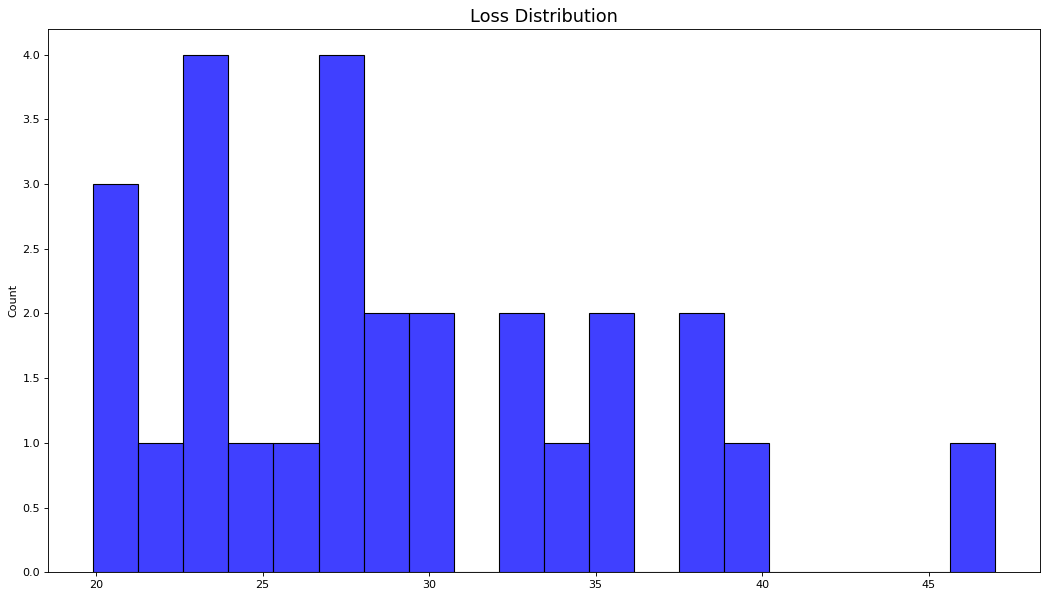

In [464]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.histplot(losses, bins = 20, kde= False, color = 'blue');
#sns.distplot(losses, bins = 20, kde= True, color = 'blue');

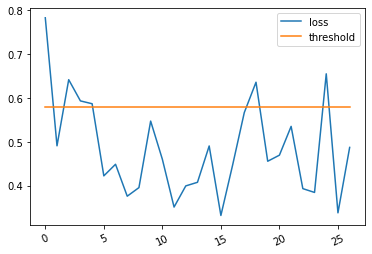

In [494]:
THRESHOLD =0.58

test_score_df = pd.DataFrame(index=range(len(losses)))
test_score_df['loss'] = [loss/60 for loss in losses]
test_score_df['y'] = test_dataset.y
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['t'] = [x[59].item() for x in test_dataset.x]

plt.plot( test_score_df.loss, label='loss')
plt.plot( test_score_df.threshold, label='threshold')
#plt.plot( test_score_df.y, label='y')
plt.xticks(rotation=25)
plt.legend();


In [495]:
import numpy as np
actual,predicted=improve_detection(test_score_df)

In [496]:

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

predicted = np.array(predicted)
actual = np.array(actual)

print_scores(predicted,actual)

True Positive	 3
True Negative	 18
False Positive	 6
False Negative	 0
Accuracy	 0.7777777777777778
Precision	 0.3333333333333333
Recall	 1.0
f-measure	 0.5
cohen_kappa_score	 0.4
auc	 0.875
roc_auc	 0.875
